In [0]:
import numpy as np
import matplotlib.pyplot as plt


def load_data():
    np.random.seed(seed=1)
    x_train = np.r_[np.random.randn(100,2)*0.4 + 1, np.random.randn(100,2)*0.4 + -1]
    y_train = np.r_[np.zeros(100), np.ones(100)]

    return x_train, y_train

def plot_data(x,y):
    plt.scatter(x[:,0], x[:,1], c = y)
    plt.ylim(-3,3)
    plt.xlim(-3,3)

def plot_decision_boundary(w):
    t = np.linspace(-2,2,100)
    plt.plot(t, (-1/w[1])*w[0]*t)
    plt.ylim(-3,3)
    plt.xlim(-3,3)


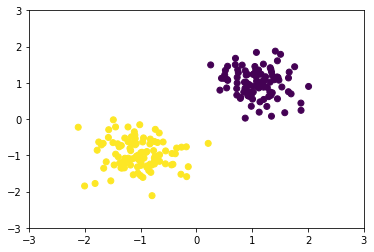

In [81]:
x_train, y_train = load_data()
plot_data(x_train, y_train)

In [0]:
def h(w, x):

    ########## Your Code goes here #############

    if np.dot(w,x) >= 0:
        return 1
    else:
        return 0
    
    ############################################

In [0]:
def perceptron_through_origin(x_train,y_train):
    #number of data points
    num_data = len(x_train)

    #initialize the weights
    w = np.array([0,0])

    for t in range(10):
        for i in range(num_data):
            ########## Your Code goes here #############
            #TODO: Check if the ith example is misclassified and update w if it is.
            if h(w, x_train[i]) != y_train[i]:
                w = w - (-1)**y_train[i]*x_train[i]
            ############################################
    return w

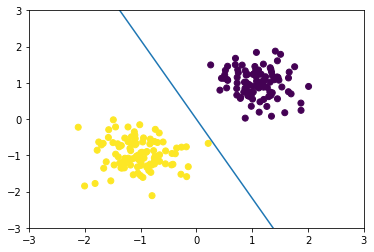

In [84]:
w = perceptron_through_origin(x_train, y_train)
plot_decision_boundary(w)
plot_data(x_train, y_train)

In [0]:
def pegasos_through_origin(x_train, y_train, lmbda):
    #number of data points
    num_data = len(x_train)

    #initialize the weights
    w = np.array([0,0])

    for t in range(1000):
        eta = 1/(t+1)
        for i in range(num_data):
            ########## Your Code goes here #############
            #TODO: Check if the ith example is misclassified and update w if it is.
            if (-1)**y_train[i]*np.dot(w, x_train[i]) <= 1:
                w = (1-eta*lmbda)*w - eta*(-1)**y_train[i]*x_train[i]
            else:
                w = (1-eta*lmbda)*w
            ############################################
    return w

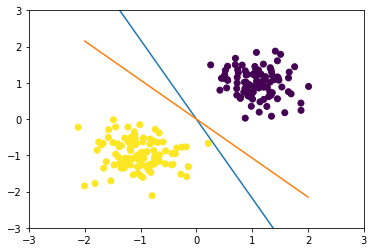

In [86]:
w_peg = pegasos_through_origin(x_train, y_train, 5)
plot_decision_boundary(w)
plot_data(x_train, y_train)
plot_decision_boundary(w_peg)

In [87]:
w_peg

array([-0.21148377, -0.19659033])